In [1]:
import numpy as np
import MPLGUI as MP
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

In [2]:
%matplotlib --list
%matplotlib inline

Available matplotlib backends: ['osx', 'qt4', 'qt5', 'gtk3', 'notebook', 'wx', 'qt', 'nbagg', 'gtk', 'tk', 'inline']


In [3]:
# Import One to One Binding Models
from Helpers.OneToOne import *

In [4]:
Kd = 10**-6
A0 = np.logspace(-6,-3,5)
SS_AB(10**-6, A0, A0)

array([  3.81966011e-07,   3.69990067e-06,   2.64771786e-05,
         1.64983356e-04,   9.68873271e-04])

In [5]:
ImgFileName = "FracVsConc.pdf"

ConcPoints  = np.load("{}/{}".format(MP.DefaultDataDir, "FracVsConc - ConcPoints.npy"))
FracRing    = np.load("{}/{}".format(MP.DefaultDataDir, "FracVsConc - Frac - Ring.npy"))
FracStacked = np.load("{}/{}".format(MP.DefaultDataDir, "FracVsConc - Frac - Stacked.npy"))

In [6]:
Images = MP.ImportImages()

FracStable	= np.sum(FracStacked[:,(7,8,10)], -1)
FracStacked	= FracStacked[:,-1]

XLim = [10.0**-11.0, 10.0**-5.0]

Bounds = (XLim[0] <= ConcPoints) & (ConcPoints<= XLim[1])

/home/vatir/anaconda3/envs/DataViewer27/lib/python2.7/site-packages/matplotlib/axes/_base.py:1322: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  'yscale=%s' % (xscale, yscale))


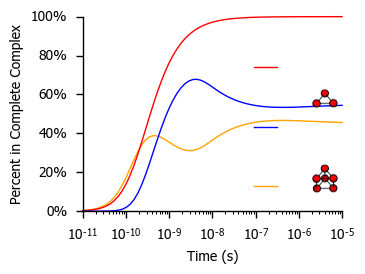

In [7]:
MainPlot = MP.LinePlot(Width="single")
MainPlot.AddLine(ConcPoints[Bounds], FracRing[Bounds], label="      ", color="red", clip_on=False, zorder=1)
MainPlot.AddLine(ConcPoints[Bounds], FracStacked[Bounds], label="      ", color="Blue", clip_on=False, zorder=1)
MainPlot.AddLine(ConcPoints[Bounds], FracStable[Bounds], label="      ", color="Orange", clip_on=False, zorder=0)

MainPlot.AddLegend(
    loc = "lower right",
    #loc = "upper right",
    labelspacing = 2.5,
    )

MainPlot.SetXRange(XLim[0],XLim[1])

MainPlot.SaveFig(ImgFileName, bbox_inches = 'tight')

#T1 =  MainPlot.Legend.get_texts()[0].get_transform()

#ImageLoc = [9.0*10.0**5.0,0.123]
LegendAdjust = (15.0, -10.0)
ImageZoom = 0.05
LegendEdges = MainPlot.Legend.get_window_extent()
ImageLoc = [LegendEdges.x0 + LegendAdjust[0], LegendEdges.y1 - np.abs(LegendEdges.y0-LegendEdges.y1)/2.0 + LegendAdjust[1]+5.0]
ab = AnnotationBbox(
    OffsetImage(
        Images[-1],
        zoom = ImageZoom,
        resample = True,
        dpi_cor = False,
        # Interpolation Options : 'none', 'nearest', 'bilinear', 'bicubic', 'spline16', 'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric', 'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos'
        interpolation = "gaussian",
        ),
    ImageLoc,
    xybox= ImageLoc,
    xycoords='axes points',
    #boxcoords="offset points",
    pad=0.0,
    frameon = False
   )
MainPlot._Plot.add_artist(ab)

#ImageLoc = [9.0*10.0**5.0,0.23]


ImageLoc = [LegendEdges.x0 + LegendAdjust[0], LegendEdges.y0 + LegendAdjust[1]]
for ImageIndex in [3,8,10,11]:
    #ImageLoc = [LegendEdges.x0 + LegendAdjust[0], LegendEdges.y1 + LegendAdjust[1]]
    ab = AnnotationBbox(
        OffsetImage(
            Images[ImageIndex],
            zoom = ImageZoom,
            resample = True,
            dpi_cor = False,
            # Interpolation Options : 'none', 'nearest', 'bilinear', 'bicubic', 'spline16', 'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric', 'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos'
            interpolation = "gaussian",
        ),
        ImageLoc,
        xybox= ImageLoc,
        xycoords='axes points',
            #boxcoords="offset points",
        pad=0.0,
        frameon = False
    )
MainPlot._Plot.add_artist(ab)

# MainPlot._Plot.text(
# 	0.07,
# 	1.0,
# 	DataSet,
# 	transform=MainPlot._Plot.transAxes,
# 	fontsize=14,
# 	verticalalignment='top',
# 	)

MainPlot.XLabel("Time (s)")
MainPlot.YLabel("Percent in Complete Complex")


In [8]:
MainPlot.SaveFig(ImgFileName, bbox_inches = 'tight')

In [9]:
# MP.OpenPDF(ImgFileName)

In [10]:
import matplotlib as mpl
mpl.__version__

'1.5.3'